#### Biological Neuron

<p align="center">
  <img src="../markdown-images/biological_neuron.png">
</p>

#### What is a perceptron?
- A perceptron takes several binary inputs, x1, x2, ..., and produces as single input. 

<p align="center">
  <img src="../markdown-images/perceptron.png">
</p>

- The above example shows the perceptron has three inputs x1, x2 and x3. 
- Weights were introduced, w1, w2,..., to express the importance to the respective inputs.
- The neurons output, 0 or 1 is determined by whether the weighted sum $\sum_{j} wjxj$ is less than or greater than the threshold value.
- In algebaric terms: <br />

<p align="center">
  <img src="../markdown-images/perceptron_equation.png">
</p>



#### Formal defination of an artifical neuron

![preceptron-diagram](../markdown-images/perceptron_diagram.png) 

Formally we can put the idea behind artifical neurons into the context of a binary classification task where we refer to our two classes as 1 (postive class) and -1 (negative class) for simplicity.

We can define a decision fucntion $\phi$(z) that takes a linera combination of input values,x, and the corresponding weight vector, **w**, where z is so called net input z = $w_{1}x_{1} + w_{2}x_{2} + \cdots + w_{n}x_{n}$

w = $\begin{bmatrix} w_{1} \\ \vdots \\ w_{m} \end{bmatrix}$
x = $\begin{bmatrix} x_{1} \\ \vdots \\ x_{m} \end{bmatrix}$

If the net input of a particular example $X^ (i)$ is greater than the threshold, $\theta $, we predict class 1, otherwise we predict class -1.  

<p align="center">
  <img src="../markdown-images/decision_function.png">
</p

For simplicity, we can bring the threshold, $\theta$, to the left side of the equation and define a weight-zero as $w_{0}=-\theta $ and $x_{0}=1$ so that we write $z$ in a more compact form:

$z = w_{0}x_{0} + w_{1}w_{2} + \cdots + w_{m}x_{m} = w^T x$

Here, the negative threshold,or weight, $w_{0} = -\theta$ is usually called the **bias unit**.

The following figure illustrates how the the net input $z = w^T x $ is squashed into a binary output (-1 and 1) by the decision function $\phi $ and how it can be used to distingusih betweeen two **linearly seperable classes**.

<p align="center">
  <img src="../markdown-images/graph_preceptron.png">
</p


#### The perceptron learning rule
The perceptron algorithm can be summarizd by the following steps:

1. Initilize the weights to 0 or small random numbers.
1. For each training exampel, $X^i$
    - Compute the output value, 
    - Update the weight

The weight vector can be updated as written below:
$w_{j} = w_{j} + \Delta w_{j}$

Update value for weight $w_{j}$

$\Delta w_{j} = \eta (y^i - \hat y ^i) x_{j} ^ i $

Here, <br/>
 - $ \eta $ is the learning rate <br/>
 - $y^i$ is the *i*th **true class label** for *i*th  training example <br/>
 - $\hat y^i$ is the predicted class label  


It  is important to note that the convergence of the perceptron is only guaranteed if two classes are linearly separable.

#### Perceptron Diagram

![preceptron-diagram](../markdown-images/perceptron_diagram.png) 

The diagram shows that the preceptron receives the inputs and combines them with their corresponding weights. The net input is then passed to the threshold function, which generates a binary output of -1 or +1. During the learning phase this output is used to calculate the erros and update the weights.

#### Implementation of preceptron using Python

First Load the Iris data 

***Iris-data download link***
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [1]:
import pandas as pd
import numpy as np
import os

filepath = os.path.join('../data', 'iris.data')
df = pd.read_csv(filepath, header=None, encoding='utf-8') 

In [2]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Convert the labels to binary , -1 for 'Iris-setosa' and 1 for 'Iris-versicolor'

In [3]:
## Select the first 100 data
labels = df.iloc[0:100, 4].values
labels = np.where(labels == 'Iris-setosa', -1, 1)
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Extract only 2 features i.e. sepal length and petal length

In [4]:
features = df.iloc[0:100, [0,2]].values
features

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

Plot and visualize the data.

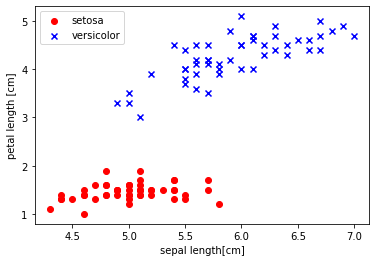

In [5]:
import matplotlib.pyplot as plt
plt.scatter(features[:50, 0], features[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(features[50:100, 0], features[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Split the data in training data and testing data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0, train_size = .75)

Training the Perceptron

In [7]:
# Import Perceptron class from perceptron.py file
from perceptron import Perceptron

perceptron = Perceptron(learning_rate=0.1, n_iter=2)
trained_perceptron = perceptron.fit(X_train, y_train)

Calculating the Accuracy

In [8]:
def accuracy_metric(trained_perceptron, test_features, test_labels):
    correct_predictions = 0
    total_predictions = len(test_labels)
    for X, label in zip(test_features, test_labels):
        predicted_label = trained_perceptron.predict(X)
        if label == predicted_label:
            correct_predictions += 1
    
    accuracy = (correct_predictions/total_predictions) * 100
    return accuracy

In [9]:
accuracy = accuracy_metric(trained_perceptron, X_test, y_test)
print(f"Accuracy = {accuracy}")

Accuracy = 100.0


In [10]:
y_test[1]

1

<AxesSubplot:>

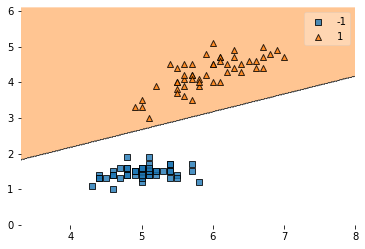

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(features, labels, clf=perceptron)